Запуск вычислений для матрицы размера 100x100...
Время на CPU для матрицы 100x100: 0.0005 секунд
Время на GPU для матрицы 100x100: 0.1362 секунд
Ускорение для матрицы 100x100: 0.00
Запуск вычислений для матрицы размера 400x400...
Время на CPU для матрицы 400x400: 0.0311 секунд
Время на GPU для матрицы 400x400: 0.0075 секунд
Ускорение для матрицы 400x400: 4.14
Запуск вычислений для матрицы размера 700x700...


C:\Users\SONDER\anaconda3\Lib\site-packages\numba\cuda\dispatcher.py:536: NumbaPerformanceWarning: Grid size 16 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))


Время на CPU для матрицы 700x700: 0.2341 секунд
Время на GPU для матрицы 700x700: 0.0446 секунд
Ускорение для матрицы 700x700: 5.25
Запуск вычислений для матрицы размера 1000x1000...
Время на CPU для матрицы 1000x1000: 0.5859 секунд
Время на GPU для матрицы 1000x1000: 0.0859 секунд
Ускорение для матрицы 1000x1000: 6.82


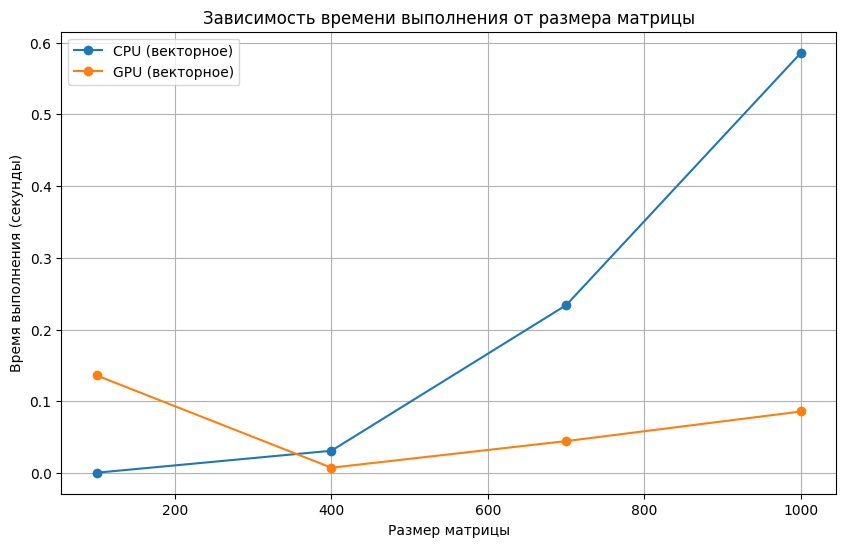

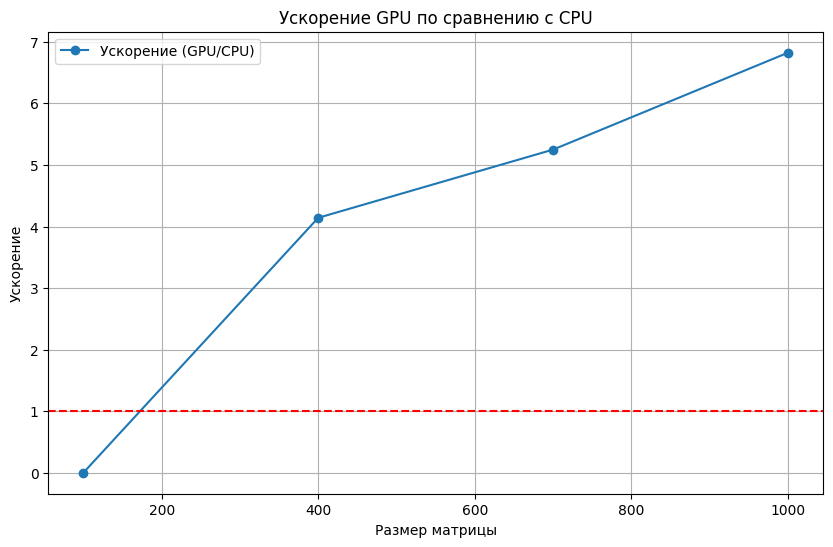

In [5]:
import numpy as np
import time
from numba import cuda
import matplotlib.pyplot as plt

# Функция для векторного умножения матриц на CPU
def cpu_mat_mul(A, B):
    return np.dot(A, B)  # Используем NumPy для векторного умножения

# Вычисление на CPU
def cpu_calc(matrix_size):
    cpu_matrix1 = np.random.randint(0, 10, (matrix_size, matrix_size))
    cpu_matrix2 = np.random.randint(0, 10, (matrix_size, matrix_size))
    
    start_time = time.time()
    cpu_matrix_res = cpu_mat_mul(cpu_matrix1, cpu_matrix2)  # Векторное умножение
    return time.time() - start_time

# Функция для векторного умножения матриц на GPU с помощью CUDA
@cuda.jit
def gpu_mat_mul(A, B, C, matrix_size):
    # Определяем индексы текущего потока
    row, col = cuda.grid(2)
    if row < matrix_size and col < matrix_size:
        # Векторное умножение
        sum = 0
        for k in range(matrix_size):
            sum += A[row, k] * B[k, col]
        C[row, col] = sum  # Сохраняем результат

# Вычисление на GPU
def gpu_calc(matrix_size):
    # Инициализация матриц для GPU
    cpu_matrix1 = np.random.randint(0, 10, (matrix_size, matrix_size))
    cpu_matrix2 = np.random.randint(0, 10, (matrix_size, matrix_size))
    
    gpu_matrix1 = cuda.to_device(cpu_matrix1)
    gpu_matrix2 = cuda.to_device(cpu_matrix2)
    gpu_matrix_res = cuda.device_array((matrix_size, matrix_size))

    # Параметры для запуска ядра
    threadsperblock = (32, 32)
    blockspergrid_x = int(np.ceil(matrix_size / threadsperblock[0]))
    blockspergrid_y = int(np.ceil(matrix_size / threadsperblock[1]))
    blockspergrid = (blockspergrid_x, blockspergrid_y)

    start_time = time.time()

    # Запуск вычисления на GPU
    gpu_mat_mul[blockspergrid, threadsperblock](gpu_matrix1, gpu_matrix2, gpu_matrix_res, matrix_size)

    cuda.synchronize()  # Ждем завершения всех потоков
    return time.time() - start_time

# Главная функция для запуска вычислений и построения графиков
def main():
    matrix_sizes = [100, 400, 700, 1000]  # Размеры матриц
    cpu_times = []
    gpu_times = []
    speedups = []

    for size in matrix_sizes:
        print(f"Запуск вычислений для матрицы размера {size}x{size}...")

        # CPU вычисления
        cpu_time = cpu_calc(size)
        cpu_times.append(cpu_time)
        print(f"Время на CPU для матрицы {size}x{size}: {cpu_time:.4f} секунд")

        # GPU вычисления
        gpu_time = gpu_calc(size)
        gpu_times.append(gpu_time)
        print(f"Время на GPU для матрицы {size}x{size}: {gpu_time:.4f} секунд")

        # Расчет ускорения
        speedup = cpu_time / gpu_time if gpu_time != 0 else float('inf')  # Избегаем деления на 0
        speedups.append(speedup)
        print(f"Ускорение для матрицы {size}x{size}: {speedup:.2f}")

    # Построение графика времени выполнения
    plt.figure(figsize=(10, 6))
    plt.plot(matrix_sizes, cpu_times, label="CPU (векторное)", marker='o')
    plt.plot(matrix_sizes, gpu_times, label="GPU (векторное)", marker='o')
    plt.title("Зависимость времени выполнения от размера матрицы")
    plt.xlabel("Размер матрицы")
    plt.ylabel("Время выполнения (секунды)")
    plt.legend()
    plt.grid(True)
    plt.show()

    # Построение графика ускорения
    plt.figure(figsize=(10, 6))
    plt.plot(matrix_sizes, speedups, label="Ускорение (GPU/CPU)", marker='o')
    plt.title("Ускорение GPU по сравнению с CPU")
    plt.xlabel("Размер матрицы")
    plt.ylabel("Ускорение")
    plt.axhline(y=1, color='r', linestyle='--')  # Линия, показывающая равенство
    plt.legend()
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    main()


In [ ]:
pip install matplotlib